## Predict a global signal with the pretrained emulator

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import VeryAccurateEmulator

In [32]:
pretrained_model = VeryAccurateEmulator.VeryAccurateEmulator()  # the pretrained emulator

In [33]:
# access the input parameters and their order
print(pretrained_model.par_labels)

['fstar', 'Vc', 'fx', 'tau', 'alpha', 'nu_min', 'Rmfp']


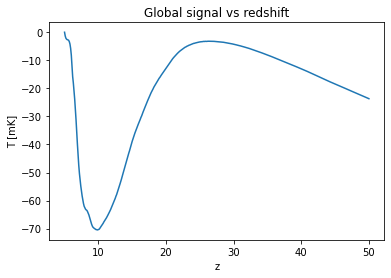

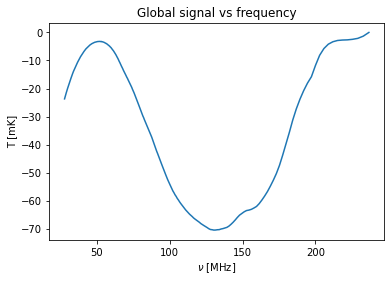

In [34]:
params = [0.0003, 4.2, 0, 0.055, 1.0, 0.1, 10]  # in the order given in the above cell

# alternatively, params can be a (N, 7)-numpy array, where N is the number of different cases you want to emulate at once.
# In that case, the output is a (N, 451)-numpy array. 
# For example, if you have a csv file with 500 cases organized in a 500x7-table, just do 
# params = np.loadtxt(<filepath>)

global_signal = pretrained_model.predict(params)  # emulate the global signal

import matplotlib.pyplot as plt
redshifts = pretrained_model.z_sampling  # an array of length 451 with redshifts 5-50:0.1
plt.figure()
plt.plot(redshifts, global_signal)
plt.title('Global signal vs redshift')
plt.xlabel('z')
plt.ylabel('T [mK]')
plt.show()

frequencies = pretrained_model.nu_sampling  # an array of length 451 with equivalent frequencies
plt.figure()
plt.plot(frequencies, global_signal)
plt.title('Global signal vs frequency')
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel('T [mK]')
plt.show()

In [46]:
import numpy as np
err = pretrained_model.compute_rms_error() # compute the relative error, with no input arguments, this computes the error on
# the same test set as used in the paper

# compute the absolute error in the frequency range 50-100 MHz, must set relative to False
abs_err = pretrained_model.compute_rms_error(relative=False, flow=50, fhigh=100)
print('Mean relative rms error:', np.mean(err))
print('Mean rms error in mK for frequencies between 50-100 MHz:', np.mean(abs_err))

# since we used no input arguments, we are testing the pretrained model on the test set in the paper. Thus, the results
# should match those given in Table 1 of the paper.

Relative rms error: 0.0040995963
Absolute rms error in mK for frequencies between 50-100 MHz: 0.63277394


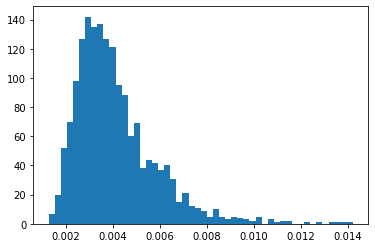

In [48]:
# Histogram of errors, should look like Figure 2 of the paper
plt.hist(err, bins=50)
plt.show()

## Training a new model

In [54]:
custom_model = VeryAccurateEmulator.VeryAccurateEmulator() # instantiate the VAE class

In [55]:
custom_model.get_hyperparameters() # the default hyperparameters

Hyperparameters are set to:
Latent dimension: 22
Encoder dimensions: [96, 224, 288, 32]
Decoder dimensions: [288]
Emulator dimensions: [160, 224]
Beta: 0.4
Gamma: 1.5


In [56]:
# change the hyperparameters: the available hyperparameters are called "latent_dim", "encoder_dims", "decoder_dims",
# "em_dims", "beta", and "gamma". This is also mentioned in the docstring. 

latent_dimension = 12
encoder_dimensions = [64, 128]
decoder_dimensions = [256]
emulator_dimensions = [160]
beta = 0.7
gamma = 1.
custom_model.set_hyperparameters(latent_dim=latent_dimension, encoder_dims=encoder_dimensions,
                                      decoder_dims=decoder_dimensions, em_dims=emulator_dimensions,
                                      beta=beta, gamma=gamma)
custom_model.get_hyperparameters() # the new hyperparameters

Hyperparameters are set to:
Latent dimension: 12
Encoder dimensions: [64, 128]
Decoder dimensions: [256]
Emulator dimensions: [160]
Beta: 0.7
Gamma: 1.0


In [57]:
# example of how to access the docstring in jupyter notebook, this can be used for any function:
custom_model.set_hyperparameters?

In [58]:
custom_model.train(epochs=50) # this takes 18 input keyword arguments, check the docstring for all their names
# as usual, the function can be passed without arguments, in which case they default to the previously used arguments
# (or the arguments we used in the pretrained emulator, if this is the first run)


Epoch 1/50
VAE train loss: 0.1188
Emulator train loss: 0.0440
VAE val loss: 0.0339
Emulator val loss: 0.0118
INFO:tensorflow:Assets written to: checkpoints/best_vae\assets
INFO:tensorflow:Assets written to: checkpoints/best_em\assets

Epoch 2/50
VAE train loss: 0.0319
Emulator train loss: 0.0070
VAE val loss: 0.0291
Emulator val loss: 0.0059
INFO:tensorflow:Assets written to: checkpoints/best_vae\assets
INFO:tensorflow:Assets written to: checkpoints/best_em\assets

Epoch 3/50
VAE train loss: 0.0302
Emulator train loss: 0.0047
VAE val loss: 0.0295
Emulator val loss: 0.0061

Epoch 4/50
VAE train loss: 0.0297
Emulator train loss: 0.0038
VAE val loss: 0.0283
Emulator val loss: 0.0061

Epoch 5/50
VAE train loss: 0.0297
Emulator train loss: 0.0037
VAE val loss: 0.0342
Emulator val loss: 0.0124

Epoch 6/50
VAE train loss: 0.0308
Emulator train loss: 0.0036
VAE val loss: 0.0310
Emulator val loss: 0.0078

Epoch 7/50
VAE train loss: 0.0287
Emulator train loss: 0.0031
VAE val loss: 0.0282
Emulat

In [59]:
custom_err = custom_model.compute_rms_error() # compute the relative error, with no input arguments, this computes the error on
# the same test set as used in the paper

# How does this model compare to the pretrained model?
print('Mean relative rms error of pretrained model:', np.mean(err))
print('Mean relative rms error of custom model:', np.mean(custom_err))

Mean relative rms error of pretrained model: 0.0040995963
Mean relative rms error of custom model: 0.016081292
